In [2]:
pip install pandas scikit-learn matplotlib pymongo


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Suppose your dataset is stored in a CSV
data = pd.read_csv('quizz.csv')  

# View the first few rows
print(data.head())


  userId  quizNumber  quizScore  passed
0   v001           1          5       0
1   v002           2          9       1
2   v003           3          2       0
3   v004           4          7       1
4   v005           5          8       1


In [5]:
# Features (quizNumber)
X = data[['quizNumber']]  # Feature must be 2D
# Target (QuizScore)
y = data['quizScore']


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()

# Train the model
model.fit(X, y)


LogisticRegression()

In [ ]:
from pymongo import MongoClient
import pandas as pd

# 1. Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # update if your connection URL is different
db = client['minor']                   # <- Replace with your database name
collection = db['quizzes']             # <- Replace with your collection name

# 2. Fetch ALL records for user 'vyom'
user_id = "vyom"
cursor = collection.find({"userId": user_id})

# 3. Prepare records safely
records = []
for doc in cursor:
    quiz_num = doc.get('quizNumber')
    quiz_score = doc.get('quizScore')
    passed = doc.get('passed')

    if quiz_num and quiz_score is not None and passed is not None:
        try:
            quiz_num_int = int(quiz_num.replace('Quiz ', '').strip())  # "Quiz 1" -> 1
            quiz_score_int = int(quiz_score)
            passed_int = int(passed)

            record = {
                'quizNumber': quiz_num_int,
                'quizScore': quiz_score_int,
                'passed': passed_int
            }
            records.append(record)
        except Exception as e:
            print(f"Error processing record {doc}: {e}")

# 4. Create DataFrame
if records:
    user_df = pd.DataFrame(records)
    user_df = user_df.sort_values(by='quizNumber')  # Sort by quiz number for proper plotting
    print("✅ DataFrame ready:")
    print(user_df)
else:
    print("⚠️ No records found or processed.")


✅ DataFrame ready:
   quizNumber  quizScore  passed
0           1          4       1
1           1          2       0
2           3          1       0
3           6          0       0


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


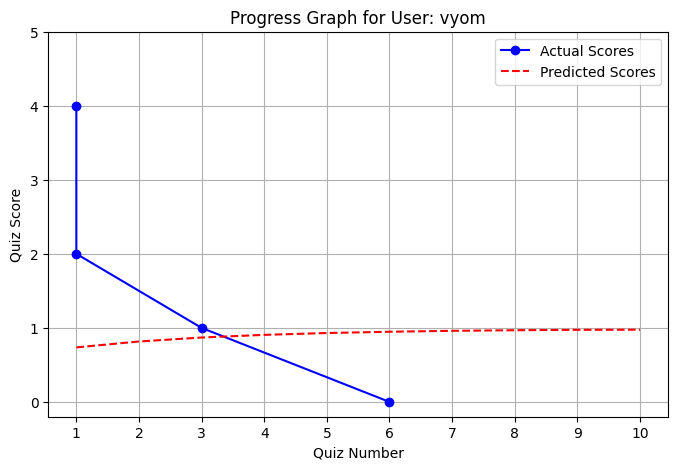

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Plot actual user data
plt.plot(user_df['quizNumber'], user_df['quizScore'], label='Actual Scores', marker='o', color='blue')
# Plot model predicted progress
quiz_range = np.arange(1, 11).reshape(-1, 1)  # Quiz 1 to Quiz 10
predicted_scores = model.predict_proba(quiz_range)[:, 1] * 10  # Probability -> scale to score out of 10
plt.plot(quiz_range, predicted_scores, label='Predicted Scores', linestyle='--', color='red')
plt.title(f'Progress Graph for User: {user_id}')
plt.xlabel('Quiz Number')
plt.ylabel('Quiz Score')
plt.xticks(range(1, 11))
plt.yticks(range(0, max(user_df['quizScore'].max(), predicted_scores.max())+2))
plt.legend()
plt.grid(True)
plt.show()
